In [3]:
import pandas as pd
import numpy as np

# Cargar el segundo dataset
df_riesgo_salud = pd.read_csv('/content/Riesgo por contaminación del aire_20082017.csv', sep=';')

# Ver las primeras filas para explorar el contenido
df_riesgo_salud


,tipo de rezago,número de modelo,municipio,grupo diagnóstico,nombre contaminante,sexo,edad,casos,rezago,beta del contaminante,exponencial del beta,limite inferior del exponencial del beta,limite superior del exponencial del beta,porcentaje del incremento del riesgo
0,Distribuido,1,Medellín,Enfermedades del oído medio y de la mastoides ...,pm10,Mujer,Menores de 5 años,14482,0:03,"0,031638292","1,032144103","1,020614717","1,043803731","3,22"
1,Distribuido,2,Medellín,Enfermedades del oído medio y de la mastoides ...,pm10,Mujer,Menores de 5 años,14482,0:07,"0,072306679","1,074984969","1,058221602","1,092013885","7,5"
2,Distribuido,3,Medellín,Enfermedades del oído medio y de la mastoides ...,pm10,Mujer,Menores de 5 años,14482,0:15,"0,115179962","1,12207535","1,100715461","1,143849737","12,21"
3,Distribuido,4,Medellín,Enfermedades del oído medio y de la mastoides ...,pm10,Hombre,Menores de 5 años,16435,0:03,"0,056099684","1,057703114","1,047968601","1,067528051","5,78"
4,Distribuido,5,Medellín,Enfermedades del oído medio y de la mastoides ...,pm10,Hombre,Menores de 5 años,16435,0:07,"0,091421038","1,095730253","1,08373911","1,107854073","9,58"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,Simple,4304,Itagüí,Enfermedades del sistema respiratorio (J00–J99),o3,Hombre,5 a 14 años,3273,15,"0,022376748","1,022628985","1,006566318","1,038947978","2,27"
1648,Simple,4305,Itagüí,Enfermedades del sistema respiratorio (J00–J99),o3,Ambos sexos,5 a 14 años,6720,0,"0,028127385","1,028526695","1,015880008","1,041330821","2,86"
1649,Simple,4306,Itagüí,Enfermedades del sistema respiratorio (J00–J99),o3,Ambos sexos,5 a 14 años,6720,3,"0,029244331","1,029676146","1,018237613","1,041243175","2,97"
1650,Simple,4307,Itagüí,Enfermedades del sistema respiratorio (J00–J99),o3,Ambos sexos,5 a 14 años,6720,7,"0,039639605","1,040435739","1,029196509","1,051797705","4,05"


In [9]:
import pandas as pd

# Cargar el dataset (asegúrate de tener el archivo correcto)
# df_riesgo_salud = pd.read_csv('ruta_a_tu_archivo.csv')

# Paso 1: Revisión de valores nulos en cada columna
print("Valores nulos por columna:")
print(df_riesgo_salud.isnull().sum())

# Paso 2: Eliminar filas con valores nulos en las columnas relevantes (por ejemplo, 'sexo', 'edad', 'casos')
df_riesgo_salud = df_riesgo_salud.dropna(subset=['sexo', 'edad', 'casos'])

# Paso 3: Convertir las columnas relevantes a tipo numérico (si es necesario)
df_riesgo_salud['edad'] = pd.to_numeric(df_riesgo_salud['edad'], errors='coerce')
df_riesgo_salud['casos'] = pd.to_numeric(df_riesgo_salud['casos'], errors='coerce')

# Paso 4: Eliminar duplicados si es necesario
df_riesgo_salud = df_riesgo_salud.drop_duplicates()

# Paso 5: Comprobación de los primeros registros y de la estructura del dataframe
print("\nPrimeras filas del dataframe limpio:")
print(df_riesgo_salud.head())

# Comprobación final de la estructura del dataframe
print("\nInformación general del dataframe:")
df_riesgo_salud.info()


Valores nulos por columna:
tipo de rezago                              0
número de modelo                            0
municipio                                   0
grupo diagnóstico                           0
nombre contaminante                         0
sexo                                        0
edad                                        0
casos                                       0
rezago                                      0
beta del contaminante                       0
exponencial del beta                        0
limite inferior del exponencial del beta    0
limite superior del exponencial del beta    0
porcentaje del incremento del riesgo        0
dtype: int64

Primeras filas del dataframe limpio:
  tipo de rezago  número de modelo municipio  \
0    Distribuido                 1  Medellín   
1    Distribuido                 2  Medellín   
2    Distribuido                 3  Medellín   
3    Distribuido                 4  Medellín   
4    Distribuido                 5  Me

In [10]:
# Filtrar solo datos de Medellín
df_medellin = df_riesgo_salud[df_riesgo_salud['municipio'].str.lower() == 'medellín'].copy()

# Reemplazar comas por puntos y convertir columnas numéricas a float
columnas_a_convertir = [
    'beta del contaminante',
    'exponencial del beta',
    'limite inferior del exponencial del beta',
    'limite superior del exponencial del beta',
    'porcentaje del incremento del riesgo'
]

for col in columnas_a_convertir:
    df_medellin[col] = df_medellin[col].str.replace(',', '.', regex=False).astype(float)

# Mostrar primeras filas y resumen
print("Primeras filas de los datos de Medellín con columnas convertidas:")
print(df_medellin.head())

print("\nInformación general del dataframe filtrado:")
df_medellin.info()


Primeras filas de los datos de Medellín con columnas convertidas:
  tipo de rezago  número de modelo municipio  \
0    Distribuido                 1  Medellín   
1    Distribuido                 2  Medellín   
2    Distribuido                 3  Medellín   
3    Distribuido                 4  Medellín   
4    Distribuido                 5  Medellín   

                                   grupo diagnóstico nombre contaminante  \
0  Enfermedades del oído medio y de la mastoides ...                pm10   
1  Enfermedades del oído medio y de la mastoides ...                pm10   
2  Enfermedades del oído medio y de la mastoides ...                pm10   
3  Enfermedades del oído medio y de la mastoides ...                pm10   
4  Enfermedades del oído medio y de la mastoides ...                pm10   

     sexo  edad  casos rezago  beta del contaminante  exponencial del beta  \
0   Mujer   NaN  14482   0:03               0.031638              1.032144   
1   Mujer   NaN  14482   0:07   

<ipython-input-11-89c0d0d406f3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_riesgo.values, y=grupo_riesgo.index, palette="coolwarm")
<ipython-input-11-89c0d0d406f3>:17: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


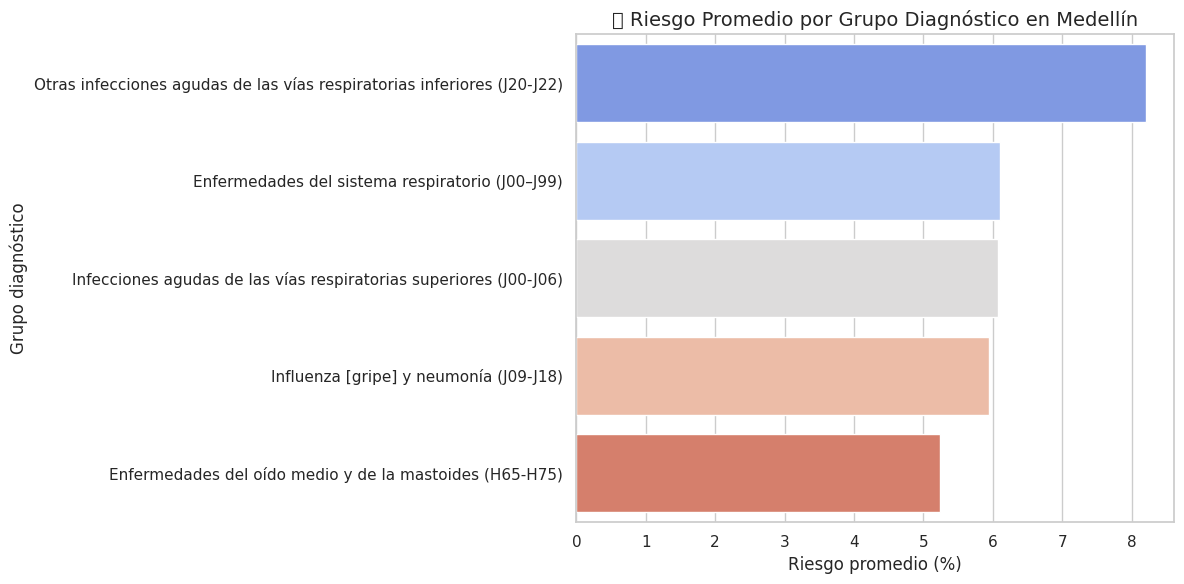

<ipython-input-11-89c0d0d406f3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contaminante_riesgo.values, y=contaminante_riesgo.index, palette="YlOrRd")


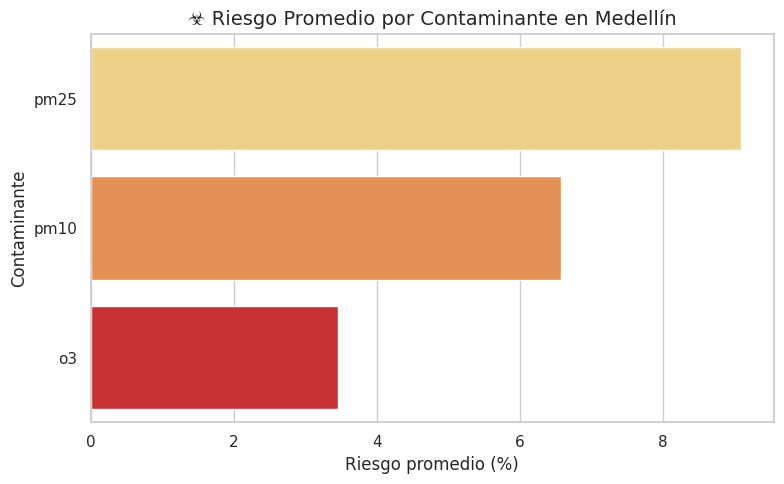

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito
sns.set(style="whitegrid", palette="Set2")

# -------------------------------
# 1. Riesgo promedio por grupo diagnóstico
# -------------------------------
plt.figure(figsize=(12, 6))
grupo_riesgo = df_medellin.groupby('grupo diagnóstico')['porcentaje del incremento del riesgo'].mean().sort_values(ascending=False)

sns.barplot(x=grupo_riesgo.values, y=grupo_riesgo.index, palette="coolwarm")
plt.title('📌 Riesgo Promedio por Grupo Diagnóstico en Medellín', fontsize=14)
plt.xlabel('Riesgo promedio (%)')
plt.ylabel('Grupo diagnóstico')
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Riesgo promedio por contaminante
# -------------------------------
plt.figure(figsize=(8, 5))
contaminante_riesgo = df_medellin.groupby('nombre contaminante')['porcentaje del incremento del riesgo'].mean().sort_values(ascending=False)

sns.barplot(x=contaminante_riesgo.values, y=contaminante_riesgo.index, palette="YlOrRd")
plt.title('☣️ Riesgo Promedio por Contaminante en Medellín', fontsize=14)
plt.xlabel('Riesgo promedio (%)')
plt.ylabel('Contaminante')
plt.tight_layout()
plt.show()


<ipython-input-13-cfa2e00ec05c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_riesgo.values, y=grupo_riesgo.index, palette="coolwarm")
<ipython-input-13-cfa2e00ec05c>:16: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


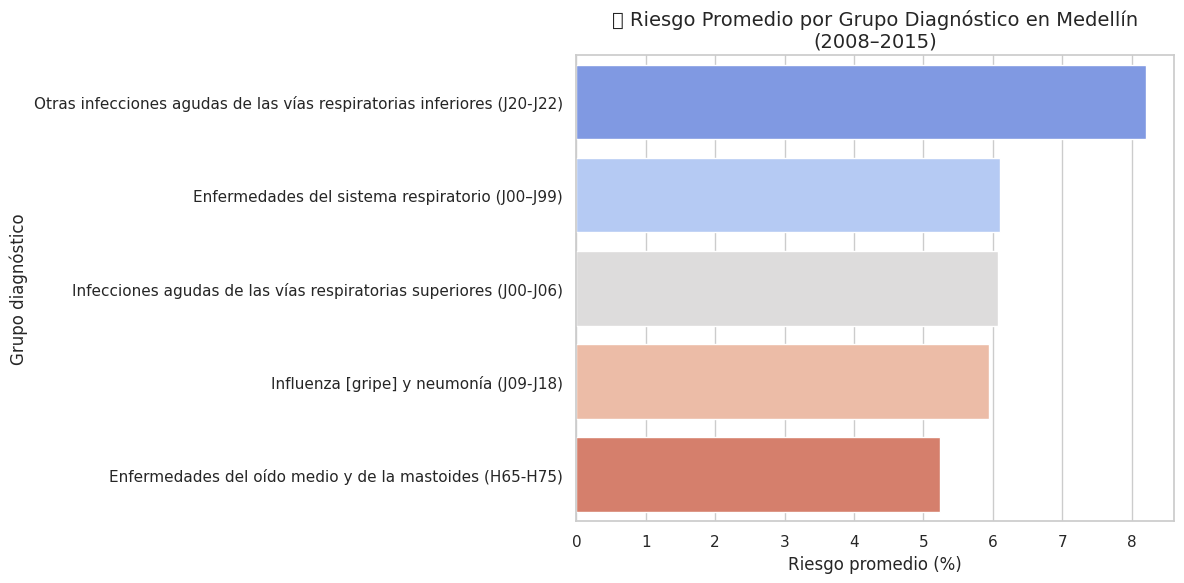

<ipython-input-13-cfa2e00ec05c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contaminante_riesgo.values, y=contaminante_riesgo.index, palette="YlOrRd")


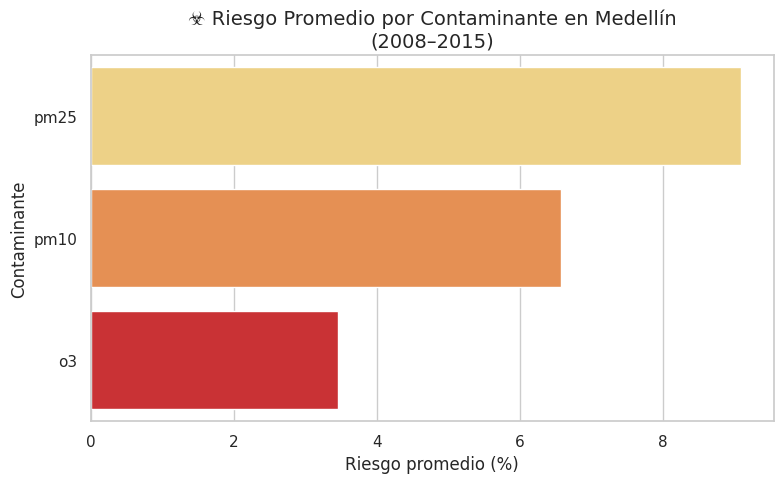

In [13]:
# Estilo visual
sns.set(style="whitegrid", palette="Set2")

periodo = "2008–2015"

# -------------------------------
# 1. Riesgo promedio por grupo diagnóstico
# -------------------------------
plt.figure(figsize=(12, 6))
grupo_riesgo = df_medellin.groupby('grupo diagnóstico')['porcentaje del incremento del riesgo'].mean().sort_values(ascending=False)

sns.barplot(x=grupo_riesgo.values, y=grupo_riesgo.index, palette="coolwarm")
plt.title(f'📌 Riesgo Promedio por Grupo Diagnóstico en Medellín\n({periodo})', fontsize=14)
plt.xlabel('Riesgo promedio (%)')
plt.ylabel('Grupo diagnóstico')
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Riesgo promedio por contaminante
# -------------------------------
plt.figure(figsize=(8, 5))
contaminante_riesgo = df_medellin.groupby('nombre contaminante')['porcentaje del incremento del riesgo'].mean().sort_values(ascending=False)

sns.barplot(x=contaminante_riesgo.values, y=contaminante_riesgo.index, palette="YlOrRd")
plt.title(f'☣️ Riesgo Promedio por Contaminante en Medellín\n({periodo})', fontsize=14)
plt.xlabel('Riesgo promedio (%)')
plt.ylabel('Contaminante')
plt.tight_layout()
plt.show()


In [14]:
# Ver cuántos valores no nulos hay en edad
df_medellin['edad'].notnull().sum()


np.int64(0)

<ipython-input-15-5acdfc1ec0d5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sexo_riesgo.index, y=sexo_riesgo.values, palette="pastel")
<ipython-input-15-5acdfc1ec0d5>:8: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


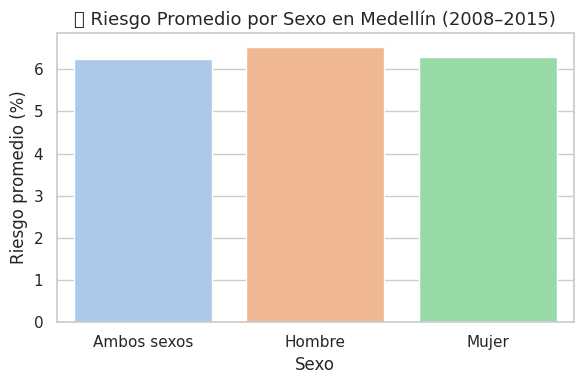

In [15]:
plt.figure(figsize=(6,4))
sexo_riesgo = df_medellin.groupby('sexo')['porcentaje del incremento del riesgo'].mean()

sns.barplot(x=sexo_riesgo.index, y=sexo_riesgo.values, palette="pastel")
plt.title('🎯 Riesgo Promedio por Sexo en Medellín (2008–2015)', fontsize=13)
plt.ylabel('Riesgo promedio (%)')
plt.xlabel('Sexo')
plt.tight_layout()
plt.show()


<ipython-input-16-a5aeafaf67c9>:7: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


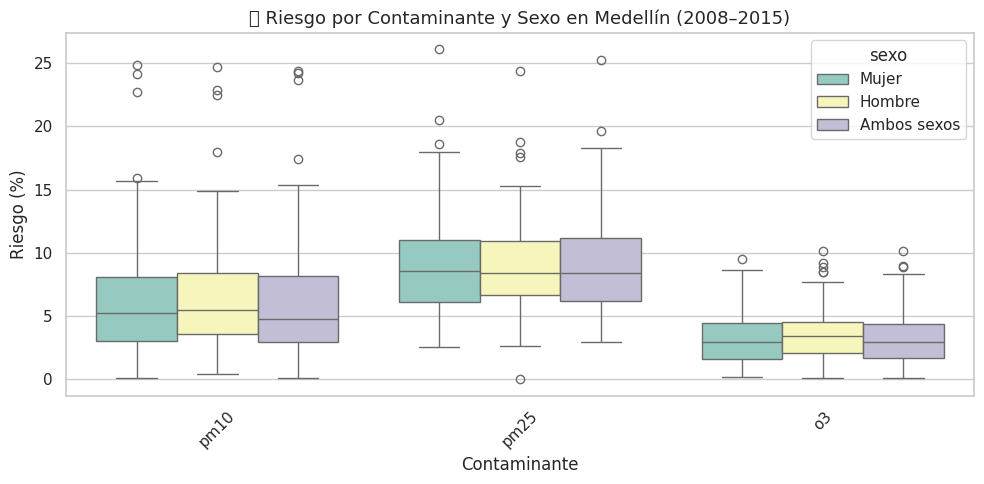

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_medellin, x='nombre contaminante', y='porcentaje del incremento del riesgo', hue='sexo', palette="Set3")
plt.title('💨 Riesgo por Contaminante y Sexo en Medellín (2008–2015)', fontsize=13)
plt.xlabel('Contaminante')
plt.ylabel('Riesgo (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-17-6271d8ad548f>:6: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


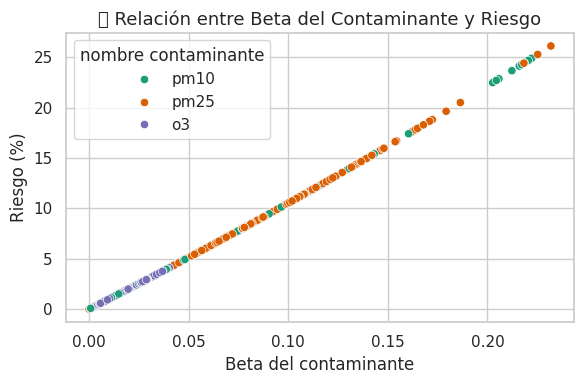

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_medellin, x='beta del contaminante', y='porcentaje del incremento del riesgo', hue='nombre contaminante', palette='Dark2')
plt.title('📈 Relación entre Beta del Contaminante y Riesgo', fontsize=13)
plt.xlabel('Beta del contaminante')
plt.ylabel('Riesgo (%)')
plt.tight_layout()
plt.show()


<ipython-input-18-53fb9604649b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rezago_riesgo.index, y=rezago_riesgo.values, palette='Set2')
<ipython-input-18-53fb9604649b>:8: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


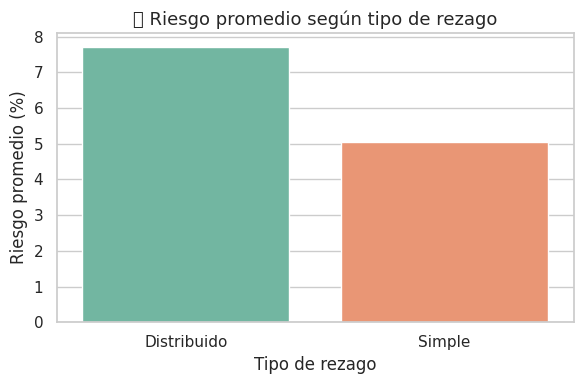

In [18]:
plt.figure(figsize=(6,4))
rezago_riesgo = df_medellin.groupby('tipo de rezago')['porcentaje del incremento del riesgo'].mean()

sns.barplot(x=rezago_riesgo.index, y=rezago_riesgo.values, palette='Set2')
plt.title('⏱️ Riesgo promedio según tipo de rezago', fontsize=13)
plt.ylabel('Riesgo promedio (%)')
plt.xlabel('Tipo de rezago')
plt.tight_layout()
plt.show()
